In [1]:
from pds4_tools import pds4_read       # to read and inspect the data and metadata
import matplotlib.pyplot as plt        # for plotting
import matplotlib
import numpy as np
# for plotting in Jupyter notebooks
%matplotlib notebook

from skimage import exposure
from skimage import data, img_as_float
import colour
from colour.plotting import *
import glob

from colour_demosaicing import (
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

cctf_encoding = colour.cctf_encoding
_ = colour.utilities.filter_warnings()
# colour.utilities.describe_environment();

In [2]:
def read_pds(path):
    data = pds4_read(path, quiet=True)
    img = np.array(data[0].data)
    img = img_as_float(img)
    return img

In [3]:
def debayer_img(img, CFA='RGGB'):
    # Menon2007 yields better edges than bilinear
    debayered = cctf_encoding(demosaicing_CFA_Bayer_Menon2007(img, CFA))
    return debayered

In [4]:
def stretch_img(img):
    # cf https://www.harrisgeospatial.com/docs/BackgroundStretchTypes.html
    # this is a 2 percent linear stretch
    p2, p98 = np.percentile(img, (2, 98))
    img = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img

In [5]:
def plot_img_and_hist(image, hist=True, bins=128):
    """Plot an image along with its histogram.
    """
    if hist:
        fig, axes = plt.subplots(2,1, figsize=(10,10), gridspec_kw={'height_ratios': [3, 1]})
        ax_img, ax_hist = axes
    else:
        fig, ax_img = plt.subplots(figsize=(10,10))

    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_axis_off()

    if hist:
        # Display histogram
        ax_hist.hist(image[:,:,0].ravel(), bins=bins, histtype='step', color='red')
        ax_hist.hist(image[:,:,1].ravel(), bins=bins, histtype='step', color='green')
        ax_hist.hist(image[:,:,2].ravel(), bins=bins, histtype='step', color='blue')

        ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
        ax_hist.set_xlabel('Pixel intensity')
        ax_hist.set_xlim(0, 1)
        ax_hist.set_yticks([])

In [6]:
def export_img(name, img):
    matplotlib.image.imsave(name, img)

# TCAM 2C color data

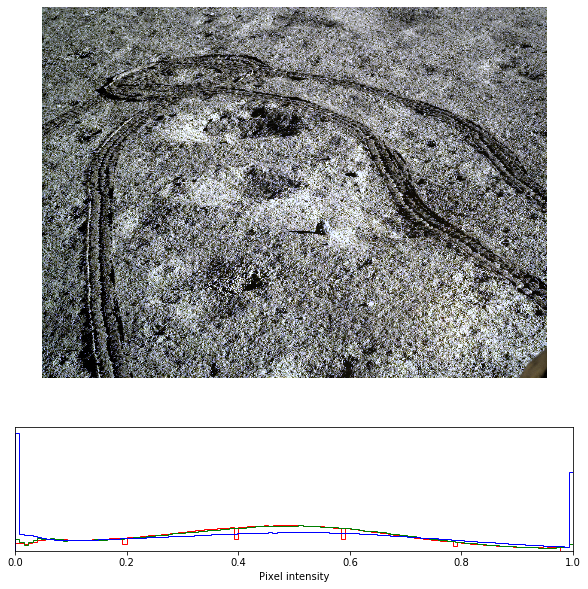

In [7]:
p = 'TCAM/CE4_GRAS_TCAM-I-065_SCI_N_20190111190315_20190111190315_0009_A.2CL'
img = read_pds(p)
plot_img_and_hist(img, hist=True)
plt.show()
# export_img(f"{p}.png", final)

# PCAM color data

(1728, 2352)


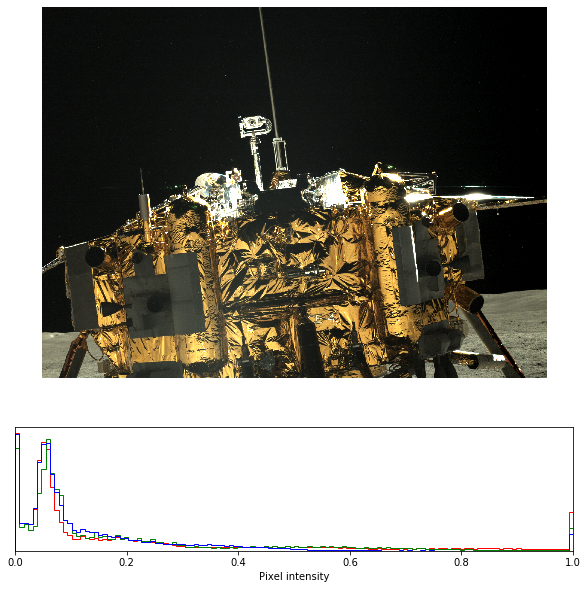

In [8]:
p = 'PCAM/CE4_GRAS_PCAML-C-006_SCI_N_20190104084559_20190104084559_0001_B.2BL'
img = read_pds(p)
print(img.shape)
debayered = debayer_img(img)
final = stretch_img(debayered)
plot_img_and_hist(final, hist=True)
plt.show()
# export_img(f"{p}.png", final)

# PCAM panchromatic data

(864, 1176)


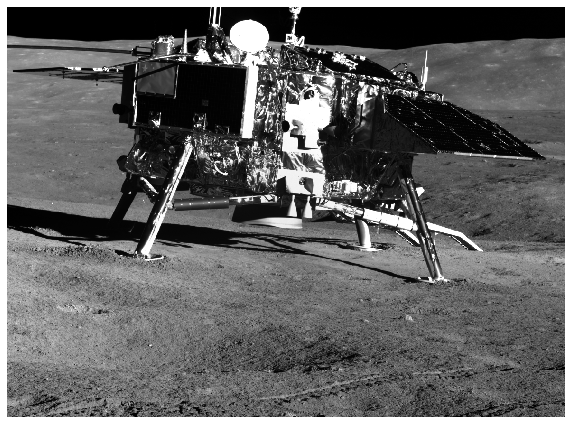

In [9]:
p = 'PCAM/CE4_GRAS_PCAMR-Q-032_SCI_N_20190112082618_20190112082618_0003_B.2BL'
img = read_pds(p)
print(img.shape)
img = stretch_img(img)
plot_img_and_hist(img, hist=False)
plt.show()